In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [10]:
df = pd.read_csv("Housing.csv")  

print(df.head())
df.isna().sum()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_area = Q1_area - 1.5 * IQR_area
upper_area = Q3_area + 1.5 * IQR_area

df = df[(df['area'] >= lower_area) & (df['area'] <= upper_area)]
print("After removing area outliers:", df.shape)

After removing area outliers: (533, 13)


In [16]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_price = Q1_price - 1.5 * IQR_price
upper_price = Q3_price + 1.5 * IQR_price

df = df[(df['price'] >= lower_price) & (df['price'] <= upper_price)]
print("After removing price outliers:", df.shape)

After removing price outliers: (518, 13)


In [17]:
X = df[['area']]  
y = df['price']       

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [19]:
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_[0])

Intercept: 2523451.5202291687
Slope (Coefficient): 410.56645544856445


In [20]:
y_pred = model.predict(X_test)

print("R² Score:", model.score(X_test, y_test))

R² Score: 0.39350256299925723


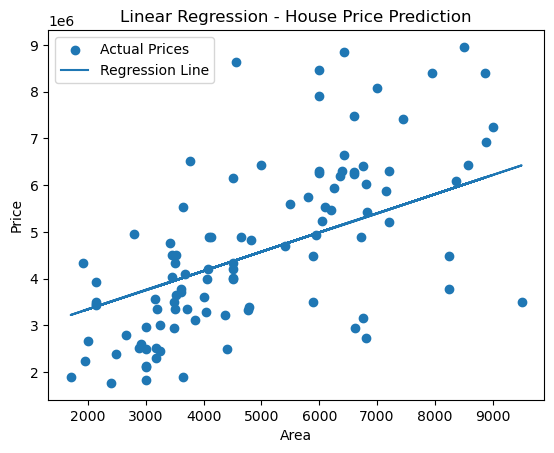

In [21]:
plt.scatter(X_test, y_test, label="Actual Prices")
plt.plot(X_test, y_pred, label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression - House Price Prediction")
plt.legend()
plt.show()